In [1]:
using LinearAlgebra
using Random
using Distributions
using StatsPlots

In [2]:
function simlogmlr(dist_true, n, logmaxlik0, logmaxlik1, L=10^5)
    sample = zeros(n)
    logmlr = zeros(L)
    for i in 1:L
        rand!(dist_true, sample)
        logmlr[i] = 2(logmaxlik1(sample) - logmaxlik0(sample))
    end
    logmlr
end

simlogmlr (generic function with 2 methods)

  0.509486 seconds (381.41 k allocations: 23.837 MiB, 32.65% compilation time)


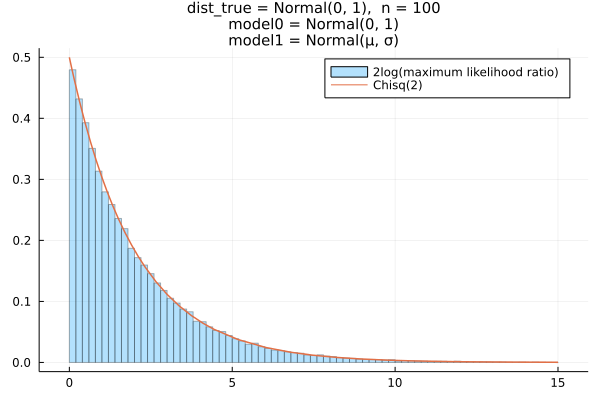

In [3]:
@time logmlr = simlogmlr(Normal(), 100,
    sample -> loglikelihood(Normal(), sample),
    sample -> loglikelihood(fit_mle(Normal, sample), sample),
)
histogram(logmlr; norm=true, alpha=0.3, bin=0:0.2:15, label="2log(maximum likelihood ratio)")
plot!(Chisq(2), 0, 15; label="Chisq(2)", lw=1.5)
title!("""
    dist_true = Normal(0, 1),  n = 100
    model0 = Normal(0, 1)
    model1 = Normal(μ, σ)
    """; titlefontsize=10)

  0.384359 seconds (146.86 k allocations: 9.550 MiB, 14.88% compilation time)


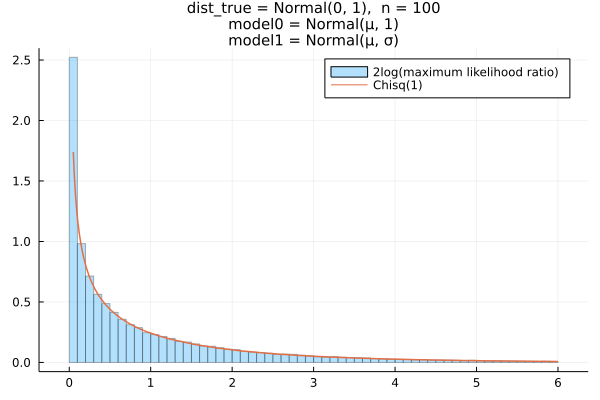

In [4]:
@time logmlr = simlogmlr(Normal(), 100,
    sample -> loglikelihood(Normal(mean(sample), 1), sample),
    sample -> loglikelihood(fit_mle(Normal, sample), sample),
)
histogram(logmlr; norm=true, alpha=0.3, bin=0:0.1:6, label="2log(maximum likelihood ratio)")
plot!(Chisq(1), 0.05, 6; label="Chisq(1)", lw=1.5)
title!("""
    dist_true = Normal(0, 1),  n = 100
    model0 = Normal(μ, 1)
    model1 = Normal(μ, σ)
    """; titlefontsize=10)

  0.473561 seconds (225.22 k allocations: 14.784 MiB, 18.18% compilation time)


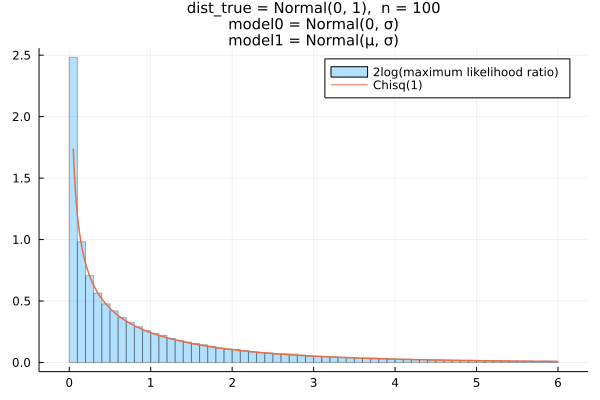

In [5]:
@time logmlr = simlogmlr(Normal(), 100,
    sample -> loglikelihood(Normal(0.0, std(sample; corrected=false, mean=0.0)), sample),
    sample -> loglikelihood(fit_mle(Normal, sample), sample),
)
histogram(logmlr; norm=true, alpha=0.3, bin=0:0.1:6, label="2log(maximum likelihood ratio)")
plot!(Chisq(1), 0.05, 6; label="Chisq(1)", lw=1.5)
title!("""
    dist_true = Normal(0, 1),  n = 100
    model0 = Normal(0, σ)
    model1 = Normal(μ, σ)
    """; titlefontsize=10)

  0.351602 seconds (52.12 k allocations: 4.048 MiB, 2.97% gc time, 6.83% compilation time)


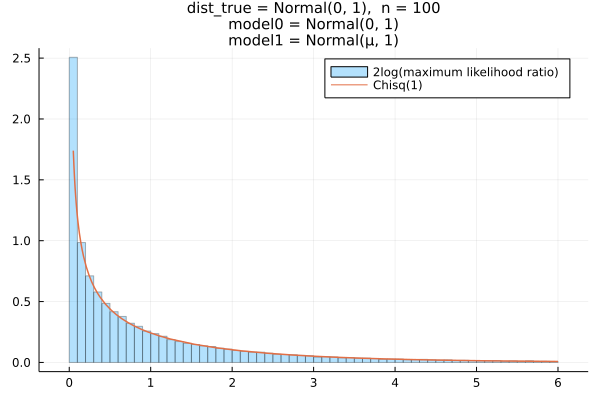

In [6]:
@time logmlr = simlogmlr(Normal(), 100,
    sample -> loglikelihood(Normal(), sample),
    sample -> loglikelihood(Normal(mean(sample), 1), sample),
)
histogram(logmlr; norm=true, alpha=0.3, bin=0:0.1:6, label="2log(maximum likelihood ratio)")
plot!(Chisq(1), 0.05, 6; label="Chisq(1)", lw=1.5)
title!("""
    dist_true = Normal(0, 1),  n = 100
    model0 = Normal(0, 1)
    model1 = Normal(μ, 1)
    """; titlefontsize=10)

  3.944313 seconds (802.86 k allocations: 46.639 MiB, 0.28% gc time, 8.43% compilation time)


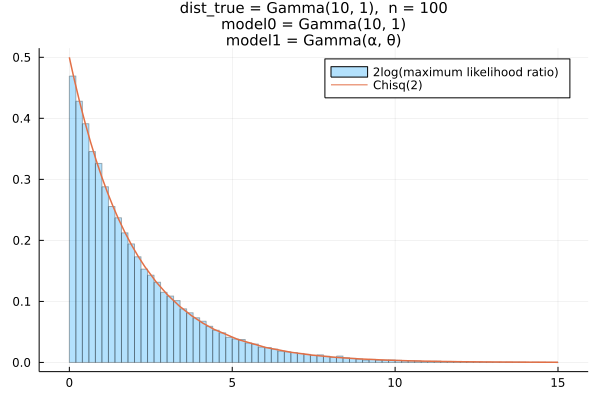

In [7]:
@time logmlr = simlogmlr(Gamma(10, 1), 100,
    sample -> loglikelihood(Gamma(10, 1), sample),
    sample -> loglikelihood(fit_mle(Gamma, sample), sample),
)
histogram(logmlr; norm=true, alpha=0.3, bin=0:0.2:15, label="2log(maximum likelihood ratio)")
plot!(Chisq(2), 0, 15; label="Chisq(2)", lw=1.5)
title!("""
    dist_true = Gamma(10, 1),  n = 100
    model0 = Gamma(10, 1)
    model1 = Gamma(α, θ)
    """; titlefontsize=10)

  0.058539 seconds (89.16 k allocations: 6.309 MiB, 71.61% compilation time)


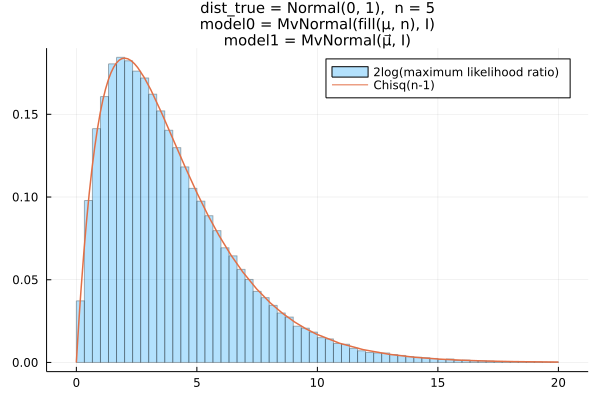

In [8]:
n = 5
@time logmlr = simlogmlr(Normal(), n,
    sample -> loglikelihood(Normal(mean(sample), 1.0), sample),
    sample -> sum(x -> logpdf(Normal(x, 1.0), x), sample),
)
histogram(logmlr; norm=true, alpha=0.3, bin=range(0, 4n; length=61), label="2log(maximum likelihood ratio)")
plot!(Chisq(n-1), 0, 4n; label="Chisq(n-1)", lw=1.5)
title!("""
    dist_true = Normal(0, 1),  n = $n
    model0 = MvNormal(fill(μ, n), I)
    model1 = MvNormal(μ⃗, I)
    """; titlefontsize=10)

  0.069004 seconds (86.61 k allocations: 6.113 MiB, 61.65% compilation time)


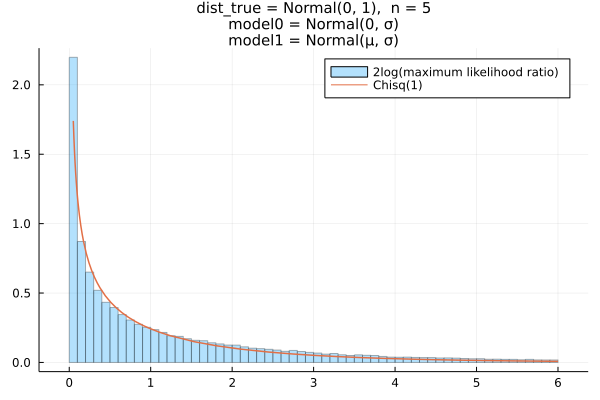

In [9]:
n = 5
@time logmlr = simlogmlr(Normal(), n,
    sample -> loglikelihood(Normal(0.0, std(sample; corrected=false, mean=0.0)), sample),
    sample -> loglikelihood(fit_mle(Normal, sample), sample),
)
histogram(logmlr; norm=true, alpha=0.3, bin=0:0.1:6, label="2log(maximum likelihood ratio)")
plot!(Chisq(1), 0.05, 6; label="Chisq(1)", lw=1.5)
title!("""
    dist_true = Normal(0, 1),  n = $n
    model0 = Normal(0, σ)
    model1 = Normal(μ, σ)
    """; titlefontsize=10)

  0.069160 seconds (86.61 k allocations: 6.113 MiB, 62.99% compilation time)


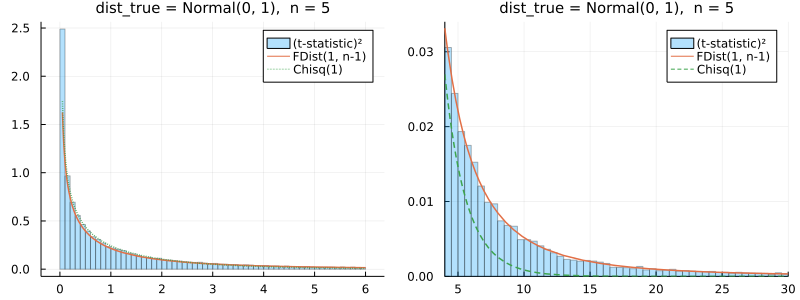

In [10]:
n = 5
@time logmlr = simlogmlr(Normal(), n,
    sample -> loglikelihood(Normal(0.0, std(sample; corrected=false, mean=0.0)), sample),
    sample -> loglikelihood(fit_mle(Normal, sample), sample),
)
fstat = @. (n - 1)*(exp(logmlr/n) - 1)

P = histogram(fstat; norm=true, alpha=0.3, bin=range(0, 6; length=61), label="(t-statistic)²")
plot!(FDist(1, n-1), 0.05, 6; label="FDist(1, n-1)", lw=1.5)
plot!(Chisq(1), 0.05, 6; label="Chisq(1)", lw=1.5, ls=:dot)
title!("dist_true = Normal(0, 1),  n = $n"; titlefontsize=10)

Q = histogram(fstat; norm=true, alpha=0.3, bin=range(0, 30; length=61), label="(t-statistic)²")
plot!(FDist(1, n-1), 4, 30; label="FDist(1, n-1)", lw=1.5)
plot!(Chisq(1), 4, 30; label="Chisq(1)", lw=1.5, ls=:dash)
title!("dist_true = Normal(0, 1),  n = $n"; titlefontsize=10)
plot!(; xlim=(4, 30), ylim=(0, 0.034))

plot(P, Q; size=(800, 300))

  0.043137 seconds (90.56 k allocations: 6.487 MiB, 79.90% compilation time)


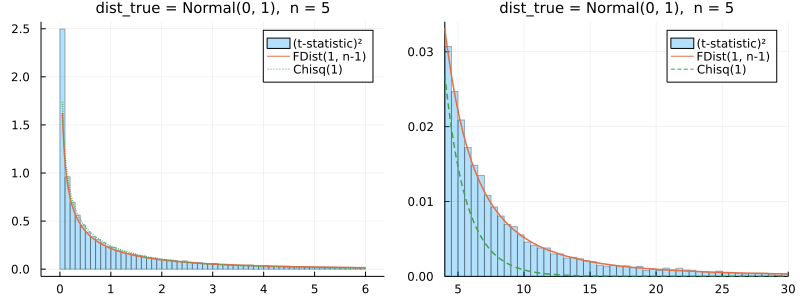

In [11]:
function simfstat(dist_true, n, L=10^5)
    sample = zeros(n)
    fstat = zeros(L)
    μ₀ = mean(dist_true)
    σ₀² = var(dist_true)
    for i in 1:L
        rand!(dist_true, sample)
        fstat[i] = (mean(sample) - μ₀)^2/(var(sample)/n)
    end
    fstat
end

n = 5
@time fstat = simfstat(Normal(2, 1), n)

P = histogram(fstat; norm=true, alpha=0.3, bin=range(0, 6; length=61), label="(t-statistic)²")
plot!(FDist(1, n-1), 0.05, 6; label="FDist(1, n-1)", lw=1.5)
plot!(Chisq(1), 0.05, 6; label="Chisq(1)", lw=1.5, ls=:dot)
title!("dist_true = Normal(0, 1),  n = $n"; titlefontsize=10)

Q = histogram(fstat; norm=true, alpha=0.3, bin=range(0, 30; length=61), label="(t-statistic)²")
plot!(FDist(1, n-1), 4, 30; label="FDist(1, n-1)", lw=1.5)
plot!(Chisq(1), 4, 30; label="Chisq(1)", lw=1.5, ls=:dash)
title!("dist_true = Normal(0, 1),  n = $n"; titlefontsize=10)
plot!(; xlim=(4, 30), ylim=(0, 0.034))

plot(P, Q; size=(800, 300))